## Introduction
In this task, we have Car-Ads dataset from kaggle. The dataset has 16 unique columns - features and almost 3.5 Million rows. Our task is to build a model which will predict the price of the car in euros with the help of these 16 features.

## Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset 
Let's load the dataset so that we can do the further operations

In [2]:
dataset_path = "Dataset/data.csv"
car_ads_dataframe = pd.read_csv(dataset_path)
df_test = car_ads_dataframe

/home/nisan/Resources/anaconda3/envs/ml/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,8,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
car_ads_dataframe.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


## Variable Identification
Let's see what kind of data is in this dataset. We will explore about it's type, info and other general properties. We will try to understand these columnwise.



Let's first see the data types of each column of the dataset.

In [4]:
car_ads_dataframe.dtypes

maker                   object
model                   object
mileage                float64
manufacture_year       float64
engine_displacement    float64
engine_power           float64
body_type               object
color_slug              object
stk_year                object
transmission            object
door_count              object
seat_count              object
fuel_type               object
date_created            object
date_last_seen          object
price_eur              float64
dtype: object

From above table, we can see that apart from `mileage`, `manufacture_year`, `engine_displacement`, `engine_powe`, and `price_eur`, all columns have object type data types. It means we have to convert into only one type.

In [5]:
car_ads_dataframe.describe()

,mileage,manufacture_year,engine_displacement,engine_power,price_eur
count,3.190328e+06,3.182334e+06,2.809498e+06,2.998035e+06,3.552912e+06
mean,1.158140e+05,2.000871e+03,2.043958e+03,9.846796e+01,1.625812e+06
std,3.422508e+05,8.172588e+01,1.973958e+03,4.907309e+01,2.025622e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e-02
25%,1.880000e+04,2.004000e+03,1.400000e+03,6.800000e+01,1.295340e+03
50%,8.641500e+04,2.009000e+03,1.798000e+03,8.600000e+01,7.364910e+03
75%,1.580250e+05,2.013000e+03,1.997000e+03,1.100000e+02,1.628423e+04
max,9.999999e+06,2.017000e+03,3.276700e+04,2.237000e+03,2.706149e+12


## Univariate Analysis (Numerical columns)
In this analysis, we will analyse the single column of the dataset.


In [ ]:
columns = car_ads_dataframe.columns.values
for column in columns:
    print("\nFor {0} column\n".format(column), "="*30)
    print(car_ads_dataframe[column].value_counts())

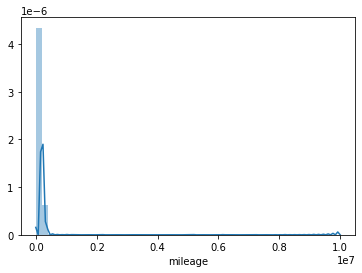

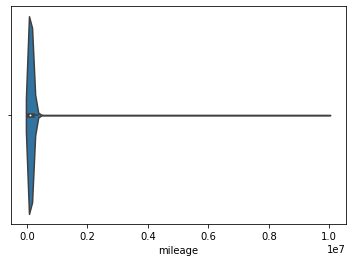

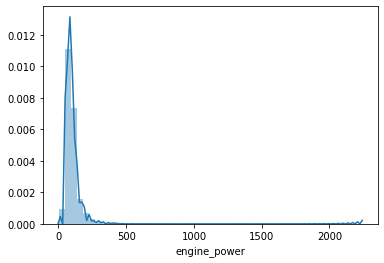

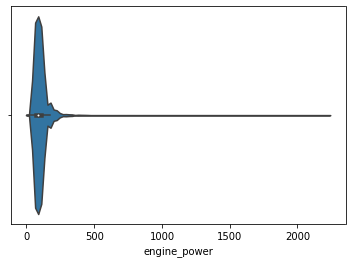

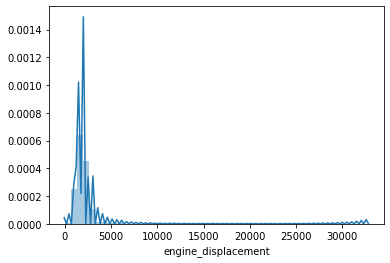

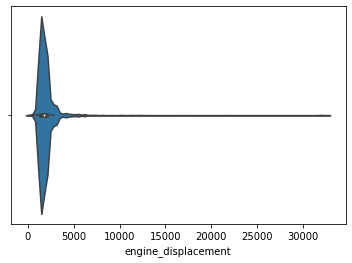

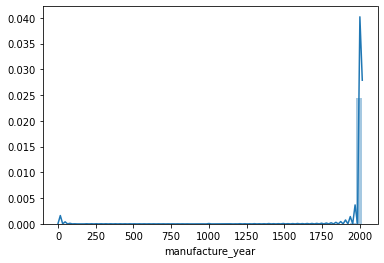

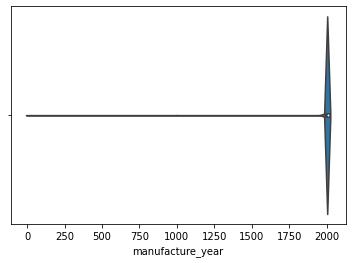

In [6]:
for i, column in enumerate(['mileage', 'engine_power', 'engine_displacement', 'manufacture_year']):
    sns.distplot(car_ads_dataframe[column])
    plt.show()
    sns.violinplot(car_ads_dataframe[column])
    plt.show()

From above graphs and plots, we can see that the data are not normally distributed i.e., there is a skewness present in the dataset. We should have to take care of it in preprocessing.

## Bi - variate Analysis
Now, we will see how each column is correlated with the `price_eur` column.


In [7]:
data_cor = car_ads_dataframe.corr()

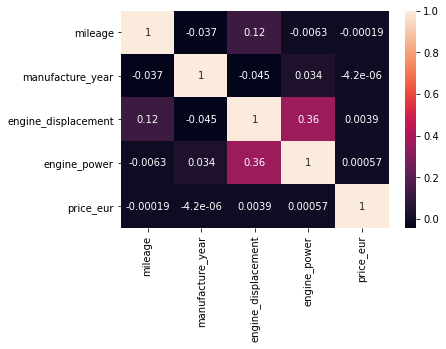

In [8]:
sns.heatmap(data=data_cor, annot=True)

From above correlation plot, we can see that `manufacture_year` column has very little correlation with `price_eur` column. We will consider this later preprocessing.

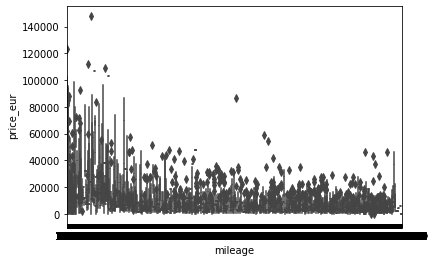

In [28]:
mileage_price_column = pd.DataFrame(car_ads_dataframe, 
                                    columns=['mileage', 'price_eur'])
sns.boxplot(x='mileage', y='price_eur', data=mileage_price_column)

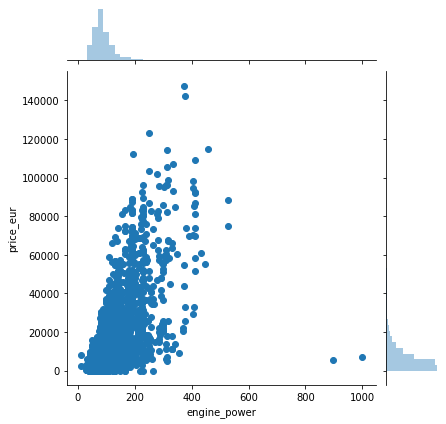

In [26]:
enginepow_price_column = pd.DataFrame(
                            car_ads_dataframe, 
                            columns=['engine_power', 'price_eur'])
sns.jointplot(x='engine_power', y='price_eur', data=enginepow_price_column)

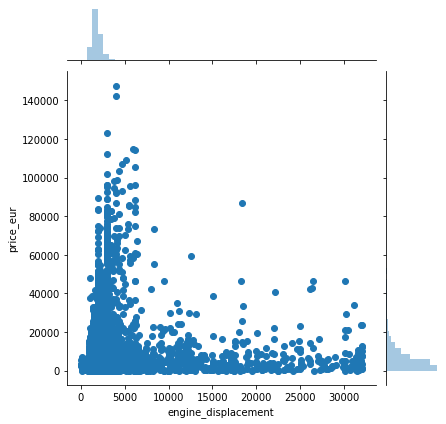

In [30]:
enginedis_price_column = pd.DataFrame(
                              car_ads_dataframe, 
                              columns=['engine_displacement', 'price_eur'])
sns.jointplot(x="engine_displacement", 
            y='price_eur',  
            data=enginedis_price_column)

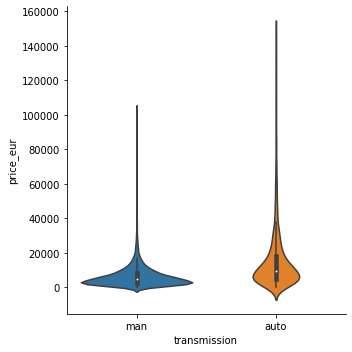

In [29]:
trans_price_column = pd.DataFrame(car_ads_dataframe, 
                                  columns=['transmission', 'price_eur'])
sns.catplot(x='transmission', 
            y='price_eur', 
            kind='violin', 
            data=car_ads_dataframe)

Now, let's visualise all the features in single frame with `pairplot` function.

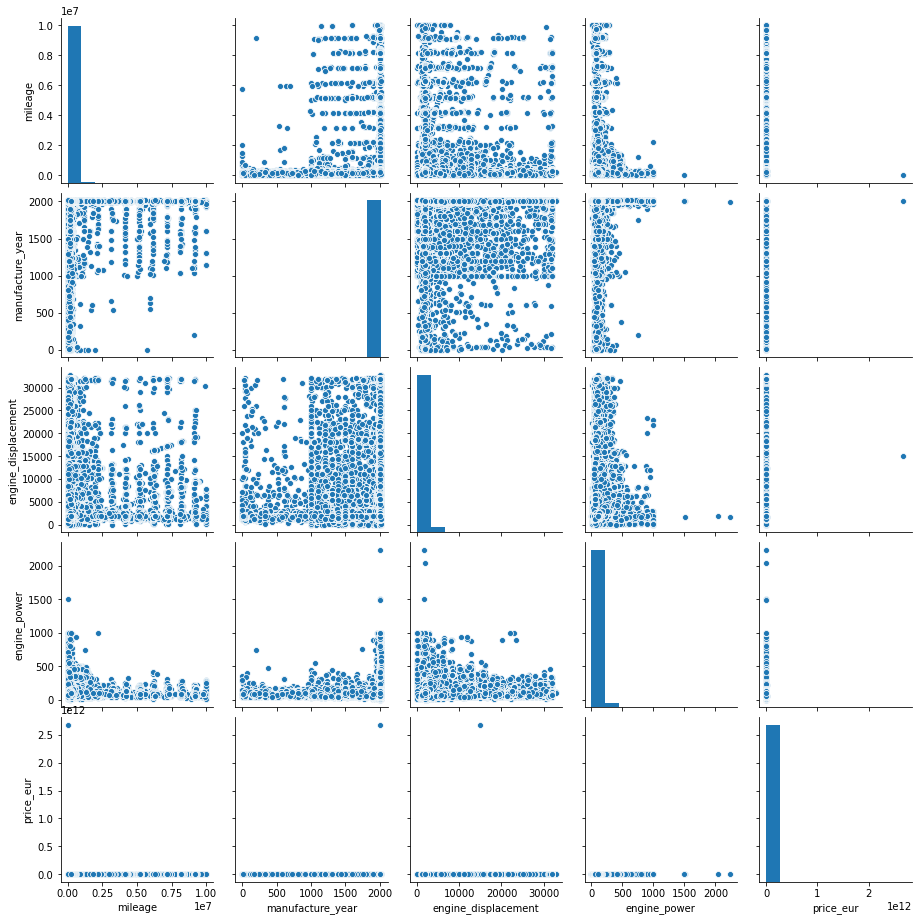

In [43]:
sns.pairplot(car_ads_dataframe)

## Interpreting and Handling Missing values

Let's see how many missing values are present in each columns of the datasets by following.

In [4]:
car_ads_dataframe.isnull().sum().sort_values(ascending=False)

color_slug             3343411
fuel_type              1847606
stk_year               1708156
model                  1133361
body_type              1122914
seat_count              749489
engine_displacement     743414
transmission            741630
door_count              614373
engine_power            554877
maker                   518915
manufacture_year        370578
mileage                 362584
price_eur                    0
date_last_seen               0
date_created                 0
dtype: int64

From above, we are dropping `color_slug` feature column because it has more than 3 Million missing values. Here, we are assuming that `date_created` and `date_last_seen` column doesn't affect the price of the car. So, we are dropping these columns also.

In [5]:
car_ads_dataframe = car_ads_dataframe.drop(['color_slug', 'date_created', 'date_last_seen'], axis=1)

Here, we are also assuming the `maker` column of the car doesn't have much effect on the price but it will help to fill the missing rows of `model` and other rows later. Hence, we are dropping only the missing rows of `maker` column here.

In [6]:
car_ads_dataframe = car_ads_dataframe[car_ads_dataframe['maker'].notna()]

In [7]:
maker_brands = car_ads_dataframe['maker'].unique()

for brand in maker_brands:
    check_brand = car_ads_dataframe['maker'] == brand
    replace_value = car_ads_dataframe['model'][check_brand].value_counts().index[0]
    car_ads_dataframe.loc[check_brand, 'model'] = car_ads_dataframe[check_brand]['model'].fillna(replace_value)

### Converting into Numerical values

As we have seen object type columns. Now, let's convert `door_count` and `seat_count` columns into numerical one.

In [9]:
car_ads_dataframe['door_count'] = car_ads_dataframe['door_count'].replace({'None':-1})
car_ads_dataframe['seat_count'] = car_ads_dataframe['seat_count'].replace({'None':-1})

Now, convert each `door_count` and `seat_count` columns into floating type.

In [10]:
car_ads_dataframe['door_count'] = car_ads_dataframe['door_count'].astype(float)
car_ads_dataframe['seat_count'] = car_ads_dataframe['seat_count'].astype(float)

We have converted `door_count` and `seat_count` columns into the floating type. Now, we will see the outliers in each columns and replace them.

In [11]:
car_ads_dataframe['door_count'] = car_ads_dataframe['door_count'].replace({-1: np.nan})
car_ads_dataframe['seat_count'] = car_ads_dataframe['seat_count'].replace({-1: np.nan})

Similarly, Let's replace `None` value with `np.nan` in the `stk_year` column. This is done because it will be easier to fill nan values later.

In [12]:
car_ads_dataframe['stk_year'] = car_ads_dataframe['stk_year'].replace({'None': np.nan})

Now, replace all the nan values of numerical columns with `median` transformation as following.

In [13]:
median_replacing_columns = ['mileage', 'manufacture_year', 'engine_power', 'seat_count', 'door_count',
                            'engine_displacement']
for column in median_replacing_columns:
    car_ads_dataframe[column] = car_ads_dataframe[column].fillna(car_ads_dataframe.groupby(['maker','model'])[column].transform('median'))

Again, replace the remaining categorical columns with `mode` transformation as following.

In [14]:
mode_replacing_columns = ['transmission', 'stk_year', 'body_type', 'fuel_type']

def get_mode(data):
    if data.count()<=0:
        return np.nan
    return data.value_counts().index[0]

for column in mode_replacing_columns:
    replacing_value = car_ads_dataframe[column].mode()[0]
    car_ads_dataframe[column] = car_ads_dataframe[column].fillna(car_ads_dataframe.groupby(['maker', 'model'])[column].transform(get_mode))

## Handling Outliers
In every dataset, there are many outliers which may directly affect the model or may introduce the noice. So, we have to identify them and eliminate before fitting dataset to the model.

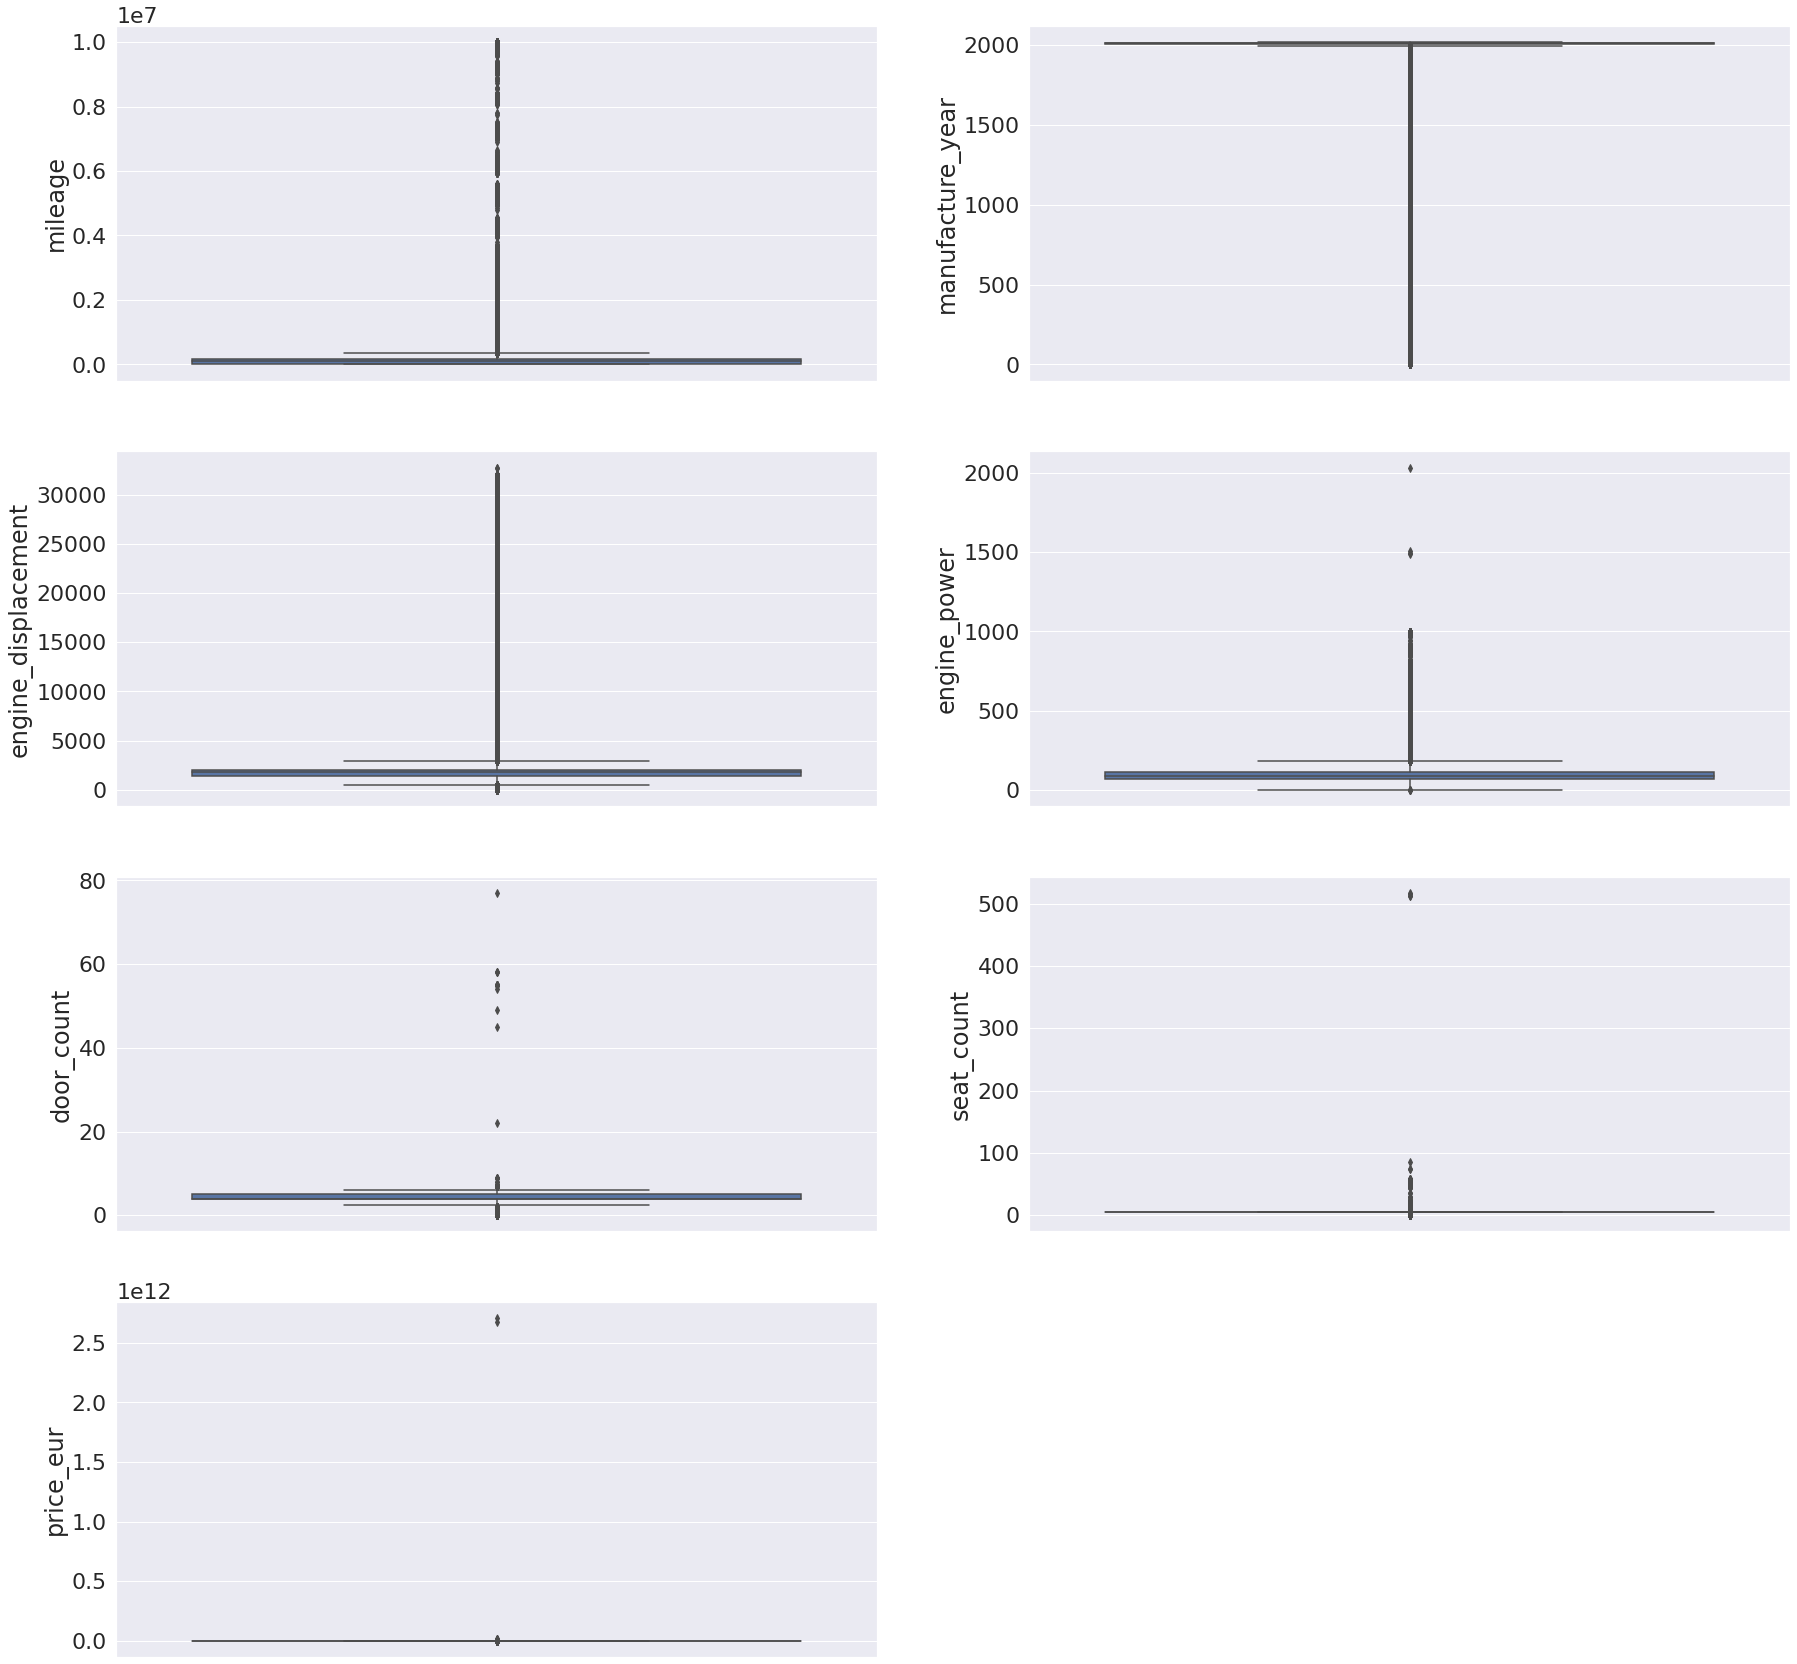

In [19]:
index = 0
sns.set(rc={'figure.figsize':(30,30)})
sns.set(font_scale=2)
for column in car_ads_dataframe.columns:
    if car_ads_dataframe[column].dtypes == 'float64':
        plt.subplot(421 + index)
        sns.boxplot(x=None, y=car_ads_dataframe[column])
        plt.plot()
        index += 1

From above boxplot we can clearly see that, `seat_count` column have outliers. So, let's remove them. Since, this is the dataset of a car. Hence, we are making an assumption that seat count and door count have maximum values of 9 and 5 respectively.

We can see that most frequent number in seat count and door count are 5 and 4 respectively. So, we are filling the nan values with these values. Along with this, we are also replacing -1, 0 and 1 values with most frequent for door count as well as 0 and 1 value with most frequent for seat count. 

In [15]:
car_ads_dataframe['door_count'] = car_ads_dataframe['door_count'].replace({-1:4, 0:4, 1:4})
car_ads_dataframe['seat_count'] = car_ads_dataframe['seat_count'].replace({0:5, 1:5})

In [16]:
car_ads_dataframe['door_count'] = car_ads_dataframe['door_count'].apply(lambda x: 4 if x > 6 else x)
car_ads_dataframe['seat_count'] = car_ads_dataframe['seat_count'].apply(lambda x: 5 if x > 10 else x)

We are almost done with the preprocessing. Now, we are dropping the remaining missing rows which doesn't have any significance and if we further consider them, they may introduce more noise to the model. Hence, drop them and reset the index as following.  

In [17]:
car_ads_dataframe.dropna(inplace=True)
car_ads_dataframe.reset_index(drop=True, inplace=True)

In [18]:
# Checking the missing values if any
car_ads_dataframe.isnull().sum().sort_values(ascending=False)

price_eur              0
fuel_type              0
seat_count             0
door_count             0
transmission           0
stk_year               0
body_type              0
engine_power           0
engine_displacement    0
manufacture_year       0
mileage                0
model                  0
maker                  0
dtype: int64

## Feature Transformation
Since, we still have categorical datas, we have to transform them into numerical form so that our model can interpret them easily. Here, `column_index` represents the list of categorical data column. We will use `LabelEncoder` for labelling.

### Label Encoding

In [29]:
car_ads_dataframe.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,stk_year,transmission,door_count,seat_count,fuel_type,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,other,2018,man,5.0,7.0,diesel,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,other,2018,man,5.0,5.0,diesel,8882.31
2,bmw,x3,97676.0,2010.0,1995.0,85.0,other,2018,man,5.0,5.0,diesel,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,other,2018,man,5.0,5.0,gasoline,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,other,2018,man,5.0,5.0,gasoline,2738.71


In [19]:
columns_index = [0, 1, 6, 8, 11]

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
data = car_ads_dataframe.values

In [22]:
for column in columns_index:
    model_encoder = LabelEncoder()
    data[:, column] = model_encoder.fit_transform(data[:, column])

### One Hot Encoding
The problem with Label Encoding is it label each category with some numbers. Although, these category doesn't have any order, our model will interpret those converted number as weighted value. Hence, to eliminate this problem we need One Hot Encoding. One of the disadvantage of this method is it will increase the feature columns. So, for extremely huge features, this may not be good in terms of computational efficiency. 

In [39]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder()

In [24]:
data

array([[10, 368, 151000.0, ..., 7.0, 1, 10584.75],
       [36, 532, 143476.0, ..., 5.0, 1, 8882.31],
       [3, 761, 97676.0, ..., 5.0, 1, 12065.06],
       ...,
       [36, 532, 230000.0, ..., 5.0, 1, 1295.34],
       [36, 346, 107759.0, ..., 5.0, 3, 1295.34],
       [26, 749, 86577.0, ..., 5.0, 1, 1295.34]], dtype=object)

In [25]:
X = data[:, :-1]
Y = data[:, -1]

## Scaling
Now, scaling the data using `StandardScaler()`

In [26]:
from sklearn.preprocessing import StandardScaler

scaler_model = StandardScaler()
X_scaled = scaler_model.fit_transform(X)

In [27]:
X_scaled

array([[-0.88275475, -0.35731097,  0.11615368, ...,  0.94428567,
         2.7090129 , -1.01615292],
       [ 0.92529252,  0.34639906,  0.09200309, ...,  0.94428567,
         0.12932831, -1.01615292],
       [-1.3695367 ,  1.32901855, -0.05500607, ...,  0.94428567,
         0.12932831, -1.01615292],
       ...,
       [ 0.92529252,  0.34639906,  0.36972844, ...,  0.94428567,
         0.12932831, -1.01615292],
       [ 0.92529252, -0.45171109, -0.02264158, ...,  0.94428567,
         0.12932831,  0.98449348],
       [ 0.22988973,  1.27752757, -0.09063171, ..., -0.17507238,
         0.12932831, -1.01615292]])

In [28]:
Y

array([10584.75, 8882.31, 12065.06, ..., 1295.34, 1295.34, 1295.34],
      dtype=object)

## Train Test Split
Now, splitting the dataset into train and test sets

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=0)

## Model Selection
Here comes the most import part of the problem. Finding the good model is a always challenging task. Here, we will use linear regression and see how it works.

In [34]:
from sklearn.linear_model import LinearRegression

regressor_model = LinearRegression()

### Fitting the Model

In [35]:
regressor_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prediction

In [36]:
y_predict = regressor_model.predict(X_test)

### Comparison

In [37]:
output_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

In [38]:
print(output_results.head(20))

     Actual     Predicted
0   11805.3  82177.318561
1   17990.3  19047.443468
2     13450  33742.790578
3     23800  35885.688368
4     15990   -104.101448
5   1295.34  38498.572067
6     11900  65145.586943
7   5144.34   5567.489309
8   12605.9   1834.047655
9   5732.05  26273.590029
10  1295.34  41914.993840
11  1991.19  73371.446482
12    10781  -6835.310419
13  2500.11  34848.718576
14    21890  36742.089029
15  4256.11  51422.815126
16  6203.44  24492.326342
17  5900.44  26865.238517
18  11756.9  30170.798298
19    22690  27720.704966


Definitely, this can't be the best model at all. We have to try other model for building the best one. But, for this EDA analysis part, we are ending up here.